Plot der regressionionsgerade de modells setup_CH4_14_08_2018

Man sieht dass es scheinbar einen systematischen Fehler gibt

In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [159]:
conc_true=np.array([0,10,20,50,100])
conc_pred=np.array([-1.79,9.93,21.57,52.95,98.46])

In [160]:
z=np.polyfit(conc_true,conc_pred,1)
p=np.poly1d(z)

In [161]:
fig, ax = plt.subplots()
ax.scatter(conc_true,conc_pred)
ax.plot(np.arange(-10,110),p(np.arange(-10,110)))
ax.set_xlabel("wahre konzentration")
ax.set_ylabel("geschaetzte Konzentration")

<IPython.core.display.Javascript object>

Text(0,0.5,'geschaetzte Konzentration')

laden der Daten zum Vergleich des Fits in Python und in c++
Es werden dieselben Daten mit Hilfe der save funktion in "PLS2 model generation" und in "Save absorbance" gespeichert.

Diese werden in den python script geladen und die Konzentrationen bestimmt. 

In [1]:
import os, sys
sys.path.append("C:\Daten\Python\DGA_simulator\simulator\pls2")
sys.path.append("C:\Daten\Python\DGA_simulator")

In [2]:
import pls2_model_set
from pls2_model_set import Dataset, PLS2_Dataset_Model_Set, Measurement

Dummy Klasse um die Daten der funktion "calc_dataset_regression_from_measurement" uebergeben zu koennen

In [3]:
class measurement():
    def __init__(self,laser_data):
        self.laser_data=laser_data
        self.reference_water_level=0

laden der Daten, welche mit "Save absorbance" gespeichert wurden

In [4]:
meas=measurement(Measurement.load_new_save_file(r"C:\Daten\Python\DGA_simulator\calibration_models\setup_CH4_14_08_2018_test\0ppm.pck"))
meas.laser_data[0]['Processed_absorbance']=meas.laser_data[0]['fitted absorbance']+meas.laser_data[0]['residuals']

128362
New measurement
time_stamp
Set_length
Number_of_sets
Environmental_integral
tuning_voltages
Forward absorbance
wavelength
fitted absorbance
residuals
model wavelengths
Notes


Laden der Daten, welche mit "PLS2 model generation" gespeichert wurden

In [5]:
meas2=measurement(Measurement.load_new_save_file(r"C:\Daten\Python\DGA_simulator\calibration_models\setup_CH4_14_08_2018_test\20180814_127570801._clc_save_file.bdf"))

32271
New measurement
Set_length
Interpolation_length
Number_of_sets
Environmental_integral
Model_wavelengths
Processed_absorbance
Notes


Berechnen der Konzentrationen

In [37]:

path=os.path.normpath(r"C:\Daten\Python\DGA_simulator\calibration_models\setup_CH4_15_08_2018_10ppm")
manifest_filename='manifest.csv'
calibration_dataset=Dataset(path,manifest_filename)
absorbance_crop_start=0
absorbance_crop_length=1200 #wird neu aus der laenge der daten bestimmt, wird hier nur definiert
min_pct_X_variance_explained=99.99
max_residual_reduction_iterations=100
max_latent_variable_factor=1
ms=PLS2_Dataset_Model_Set(calibration_dataset,absorbance_crop_start,absorbance_crop_length,
                                         min_pct_X_variance_explained,max_residual_reduction_iterations,
                                         max_latent_variable_factor,max_err=1e-10,autoscale_X=False,autoscale_Y=False)

Loading dataset: 20180815_2094372721.
32271
New measurement
Set_length
Interpolation_length
Number_of_sets
Environmental_integral
Model_wavelengths
Processed_absorbance
Notes
Loading dataset: 20180815_37030061.
32271
New measurement
Set_length
Interpolation_length
Number_of_sets
Environmental_integral
Model_wavelengths
Processed_absorbance
Notes
Loading dataset: 20180815_1658203743.
32271
New measurement
Set_length
Interpolation_length
Number_of_sets
Environmental_integral
Model_wavelengths
Processed_absorbance
Notes
Loading dataset: 20180815_568196199.
32271
New measurement
Set_length
Interpolation_length
Number_of_sets
Environmental_integral
Model_wavelengths
Processed_absorbance
Notes
Loading dataset: 20180815_886559.
32271
New measurement
Set_length
Interpolation_length
Number_of_sets
Environmental_integral
Model_wavelengths
Processed_absorbance
Notes
8388608
[8388608]
8388608
100000000000000000000000
new permutation
[ True False False False False False False False False False Fals

In [39]:
for name in calibration_dataset.concentration_measurement_names:
    print calibration_dataset.measurements[name].concentrations
    print ms.models[ms.models.keys()[0]].calc_dataset_regression_from_measurement(calibration_dataset.measurements[name])[0]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.48704706]
[2.83 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[2.40427249]
[4.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0. ]
[4.52049944]
[7.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0. ]
[7.96861862]
[9.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0. ]
[10.0495624]


In [35]:
fit_conc,fit_abs,t = ms.models[ms.models.keys()[0]].calc_dataset_regression_from_measurement(meas)
fit_conc2,fit_abs2,t2 = ms.models[ms.models.keys()[0]].calc_dataset_regression_from_measurement(meas2)

In [36]:
print fit_conc
print fit_conc2

[-1.79104752]
[-1.79104752]


Die Konzentrationen sind identisch mit denjenigen, die ich mit dem DGA simulator erhalte. 

Die residuen sind identisch

<IPython.core.display.Javascript object>


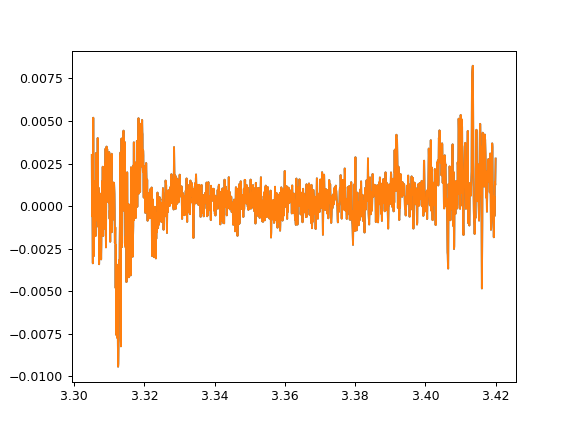

In [15]:
plt.figure()
plt.plot(meas.laser_data[0]['model wavelengths'],meas.laser_data[0]['Processed_absorbance']-fit_abs)
plt.plot(meas.laser_data[0]['model wavelengths'],meas2.laser_data[0]['Processed_absorbance']-fit_abs2)